#Для начала загрузим датасеты с гита,  потом присоединим диск

Источники вдохновения
1. https://www.youtube.com/watch?v=BuUkDZoofuI
2. https://proglib.io/p/kaggle-za-30-minut-razbiraemsya-s-sorevnovaniem-house-prices-2021-09-28


In [1]:
!git clone https://github.com/PurdueSIGAI/Kaggle-Fall-2018.git 

Cloning into 'Kaggle-Fall-2018'...
remote: Enumerating objects: 15, done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 15
Unpacking objects: 100% (15/15), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!ls

drive  Kaggle-Fall-2018  sample_data


In [4]:
import os

In [5]:
os.rename("Kaggle-Fall-2018","dataset")

In [6]:
%cd dataset/

/content/dataset


In [7]:
!ls

california_housing_test.csv  california_housing_train.csv  README.md


Подгрузим библиотеки, которые нам понадобятся на первом этапе, т.е для обработки

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
#для графиков
matplotlib.rcParams['figure.figsize'] = (15.0,7.0)
plt.style.use('dark_background')


In [9]:
table = pd.read_csv("california_housing_train.csv")

In [10]:
table

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.00,37.55,27,6103,1249,3026,1134,4.1591,332400
1,-122.07,37.93,25,7201,1521,3264,1433,3.7433,252100
2,-118.02,33.90,34,2678,511,1540,497,4.4954,202900
3,-121.79,39.73,8,5690,1189,2887,1077,3.0625,116300
4,-120.90,39.93,23,2679,546,1424,529,2.8812,81900
...,...,...,...,...,...,...,...,...,...
13593,-118.20,34.21,40,1477,228,609,224,7.8375,500001
13594,-121.29,38.14,27,836,132,303,133,3.8750,127400
13595,-118.17,33.84,45,1533,331,791,335,3.4605,186600
13596,-119.29,36.31,34,1439,253,607,223,3.0972,82800


Давайте посмотрим на кореляцию мб можно редуцировать размер датасета

In [11]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


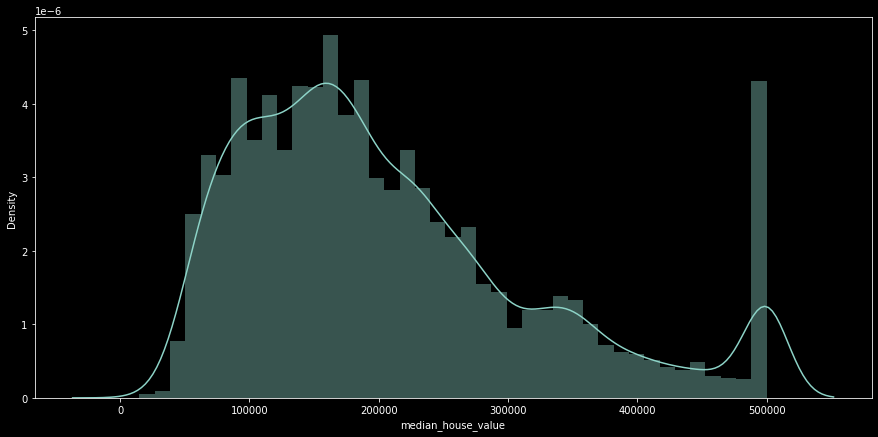

In [12]:
sns.distplot(table['median_house_value'])

In [13]:
# Рассчитываем асимметрию и эксцесс
print("Ассиметрия: %f" % table['median_house_value'].skew())
print("Эксцесс: %f" % table['median_house_value'].kurt())

Ассиметрия: 0.976350
Эксцесс: 0.327735


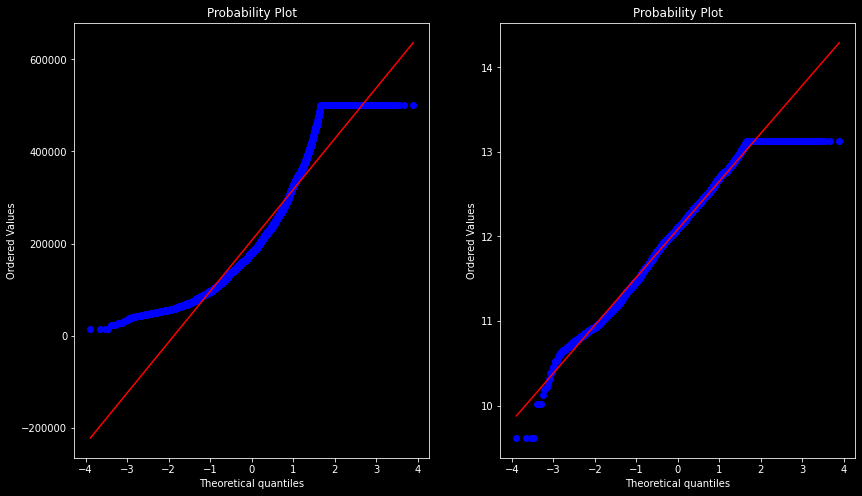

In [14]:
from scipy import stats 

fig = plt.figure(figsize = (14,8))

# Распределение на необработанных данных
fig.add_subplot(1,2,1)
res = stats.probplot(table['median_house_value'], plot=plt)

# Распределение при условии, что мы прологарифмировали 'median_house_value'
fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(table['median_house_value']), plot=plt)

In [15]:
table['median_house_value'] = np.log1p(table['median_house_value']) #np.expm1(Y) back function


In [16]:
table

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.00,37.55,27,6103,1249,3026,1134,4.1591,12.714097
1,-122.07,37.93,25,7201,1521,3264,1433,3.7433,12.437585
2,-118.02,33.90,34,2678,511,1540,497,4.4954,12.220473
3,-121.79,39.73,8,5690,1189,2887,1077,3.0625,11.663937
4,-120.90,39.93,23,2679,546,1424,529,2.8812,11.313266
...,...,...,...,...,...,...,...,...,...
13593,-118.20,34.21,40,1477,228,609,224,7.8375,13.122367
13594,-121.29,38.14,27,836,132,303,133,3.8750,11.755095
13595,-118.17,33.84,45,1533,331,791,335,3.4605,12.136728
13596,-119.29,36.31,34,1439,253,607,223,3.0972,11.324195


In [17]:
table.shape

(13598, 9)

In [18]:
table['median_house_value'].describe()

count    13598.000000
mean        12.084213
std          0.571224
min          9.615805
25%         11.689614
50%         12.102937
75%         12.483708
max         13.122367
Name: median_house_value, dtype: float64

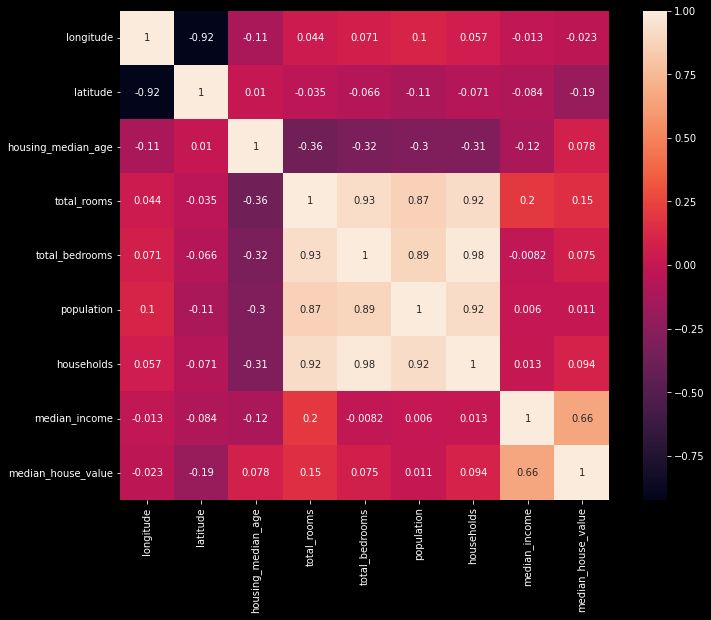

In [19]:
corrmat = table.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot=True, vmax=1.0, square=True);

Сократим число коррелирующих признаков

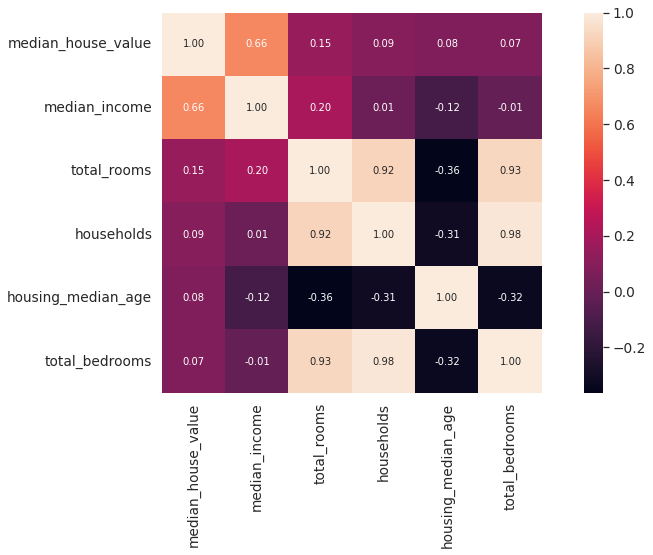

In [20]:
k = 6 # количество коррелирующих признаков, которое мы хотим увидеть
cols = corrmat.nlargest(k, 'median_house_value')['median_house_value'].index
cm = np.corrcoef(table[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Проверим на наличие выбросов

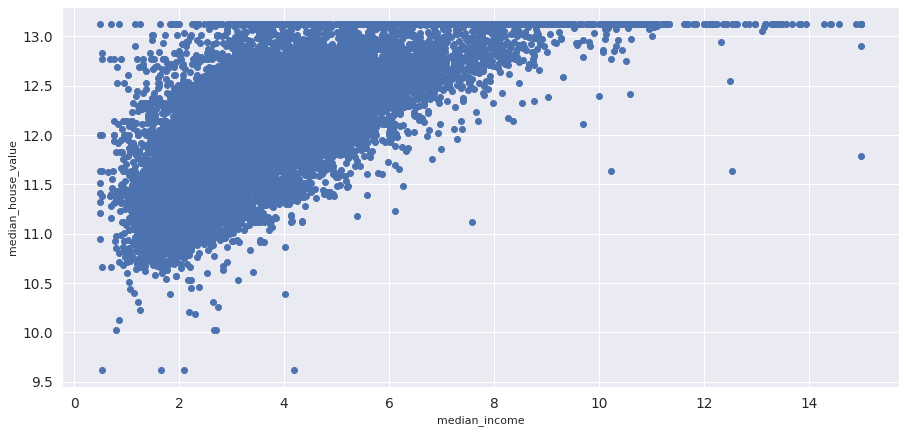

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = table['median_income'], y = table['median_house_value'])
plt.ylabel('median_house_value', fontsize=11)
plt.xlabel('median_income', fontsize=11)
plt.grid(True)
plt.style.use('dark_background')
plt.show()

In [22]:
# Ликвидируем 
# Только эти 1 удаления помогут нам улучшить наш показатель на таблице лидеров
table1 = table.drop(table[(table['median_income'] > 10)].index) # пример записи & (table['pepega'] < 220000)]

In [23]:
table1.shape

(13395, 9)

In [24]:
table1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.00,37.55,27,6103,1249,3026,1134,4.1591,12.714097
1,-122.07,37.93,25,7201,1521,3264,1433,3.7433,12.437585
2,-118.02,33.90,34,2678,511,1540,497,4.4954,12.220473
3,-121.79,39.73,8,5690,1189,2887,1077,3.0625,11.663937
4,-120.90,39.93,23,2679,546,1424,529,2.8812,11.313266
...,...,...,...,...,...,...,...,...,...
13593,-118.20,34.21,40,1477,228,609,224,7.8375,13.122367
13594,-121.29,38.14,27,836,132,303,133,3.8750,11.755095
13595,-118.17,33.84,45,1533,331,791,335,3.4605,12.136728
13596,-119.29,36.31,34,1439,253,607,223,3.0972,11.324195


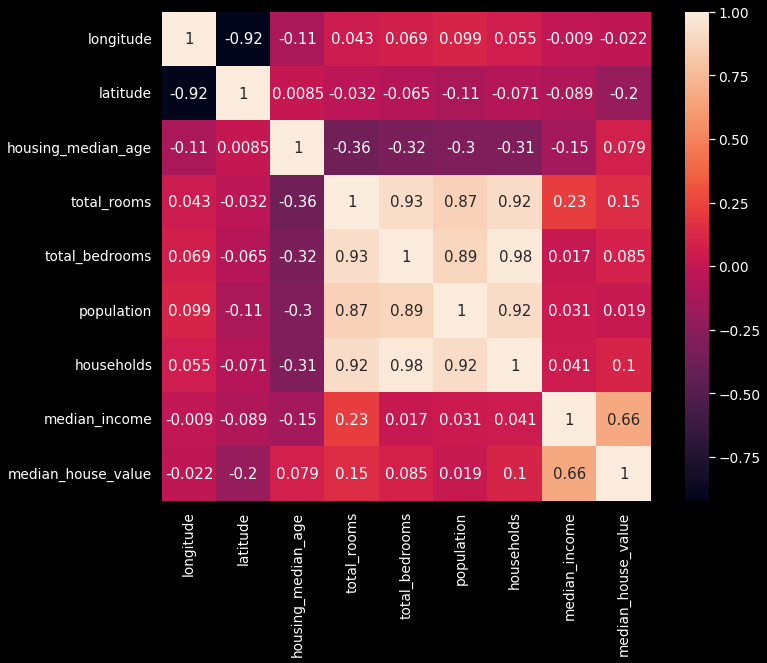

In [25]:
corrmat = table1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot=True, vmax=1.0, square=True);

In [26]:
#выведем пропущенные значения, будет полезно для соревнований
table1.isnull().sum().sort_values(ascending=False).head(20)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Если в данных есть пробелы то их нужно заполнить

Вернем данные в то состояние, в котором они были (иммется ввиду последний столбец)

In [27]:
table1['median_house_value'] = np.expm1(table1['median_house_value']) #np.expm1(Y) back function

In [28]:
table1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.00,37.55,27,6103,1249,3026,1134,4.1591,332400.0
1,-122.07,37.93,25,7201,1521,3264,1433,3.7433,252100.0
2,-118.02,33.90,34,2678,511,1540,497,4.4954,202900.0
3,-121.79,39.73,8,5690,1189,2887,1077,3.0625,116300.0
4,-120.90,39.93,23,2679,546,1424,529,2.8812,81900.0
...,...,...,...,...,...,...,...,...,...
13593,-118.20,34.21,40,1477,228,609,224,7.8375,500001.0
13594,-121.29,38.14,27,836,132,303,133,3.8750,127400.0
13595,-118.17,33.84,45,1533,331,791,335,3.4605,186600.0
13596,-119.29,36.31,34,1439,253,607,223,3.0972,82800.0


Нормализуем наши тестовые данные

In [29]:
scaler = MinMaxScaler()

In [30]:
table1 = pd.DataFrame(scaler.fit_transform(table1))

In [31]:
table1

,0,1,2,3,4,5,6,7,8
0,0.234064,0.532412,0.509804,0.160828,0.193543,0.105836,0.186184,0.385175,0.654432
1,0.227092,0.572795,0.470588,0.189772,0.235760,0.114169,0.235362,0.341407,0.488866
2,0.630478,0.144527,0.647059,0.070542,0.079000,0.053811,0.081414,0.420575,0.387423
3,0.254980,0.764081,0.137255,0.149941,0.184231,0.100970,0.176809,0.269745,0.208867
4,0.343625,0.785335,0.431373,0.070568,0.084433,0.049750,0.086678,0.250661,0.137940
...,...,...,...,...,...,...,...,...,...
13390,0.612550,0.177471,0.764706,0.038882,0.035077,0.021216,0.036513,0.772371,1.000000
13391,0.304781,0.595112,0.509804,0.021985,0.020177,0.010503,0.021546,0.355270,0.231754
13392,0.615538,0.138151,0.862745,0.040359,0.051063,0.027588,0.054770,0.311639,0.353815
13393,0.503984,0.400638,0.647059,0.037881,0.038957,0.021146,0.036349,0.273397,0.139795


#Мы разобрались с подготовкой данных, теперь перейдем созданию NN

Имортируем модули pytorch

In [76]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.utils.data.dataloader as dataloader
import torch.nn.functional as F
from sklearn.metrics import balanced_accuracy_score


Структура нейронки

In [56]:
class NN (nn.Module):
  def __init__(self,input_size, hidden_size1,hidden_size2,hidden_size3,n_class):
    super(NN,self).__init__()
    self.fc1 =nn.Linear(input_size, hidden_size1,bias = True)
    self.fc2 =nn.Linear(hidden_size1, hidden_size2,bias = True)
    self.dropout1 = nn.Dropout(p = 0.6)
    self.fc3 =nn.Linear(hidden_size2, hidden_size3,bias = True)
    self.dropout2 = nn.Dropout(p = 0.2)
    self.fc4 =nn.Linear(hidden_size3, n_class,bias = True)
  def forward(self,x): #последовательная прогонка по скрытым слоям
    x = F.relu(self.fc1(x)) 
    x = F.relu(self.fc2(x))
    x = self.dropout1(self.fc3(x))
    # x = F.relu(self.fc3(x))
    x = self.dropout2(self.fc4(x))
    return x


In [57]:
team_nn = NN(8,1000,1500,1000,1)

In [58]:
team_nn

NN(
  (fc1): Linear(in_features=8, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1500, bias=True)
  (dropout1): Dropout(p=0.6, inplace=False)
  (fc3): Linear(in_features=1500, out_features=1000, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=1000, out_features=1, bias=True)
)

In [59]:
#функция потерь и метод оптимизации
optimizer = optim.Adam(team_nn.parameters(),lr = 0.001)
criterion = nn.MSELoss()

In [60]:
table1 

,0,1,2,3,4,5,6,7,8
0,0.234064,0.532412,0.509804,0.160828,0.193543,0.105836,0.186184,0.385175,0.654432
1,0.227092,0.572795,0.470588,0.189772,0.235760,0.114169,0.235362,0.341407,0.488866
2,0.630478,0.144527,0.647059,0.070542,0.079000,0.053811,0.081414,0.420575,0.387423
3,0.254980,0.764081,0.137255,0.149941,0.184231,0.100970,0.176809,0.269745,0.208867
4,0.343625,0.785335,0.431373,0.070568,0.084433,0.049750,0.086678,0.250661,0.137940
...,...,...,...,...,...,...,...,...,...
13390,0.612550,0.177471,0.764706,0.038882,0.035077,0.021216,0.036513,0.772371,1.000000
13391,0.304781,0.595112,0.509804,0.021985,0.020177,0.010503,0.021546,0.355270,0.231754
13392,0.615538,0.138151,0.862745,0.040359,0.051063,0.027588,0.054770,0.311639,0.353815
13393,0.503984,0.400638,0.647059,0.037881,0.038957,0.021146,0.036349,0.273397,0.139795


In [61]:
#здесь нужно дописать перевод данных в тензоры
labels = table1[8].values
train_dataset = table1.iloc[:,0:8].values

In [62]:
train_dataset.shape

(13395, 8)

In [63]:
train_dataset = torch.tensor(train_dataset,dtype=torch.float32)
labels = torch.tensor(labels,dtype=torch.float32)

In [64]:
tr_data = torch.utils.data.TensorDataset(train_dataset, labels)

In [65]:
Data_set = torch.utils.data.DataLoader(dataset=tr_data,shuffle = True,batch_size = 10)

In [66]:
def train(epoch,optimizer,criterion):
  losses =[]
  for epoch in range(epoch):
    for i, (inputs,labels) in enumerate(Data_set):
      pred = team_nn(inputs)
      loss = criterion(pred,labels)
      # running_loss += loss.item()*inputs.size(0)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      losses.append(loss)
      if (i + epoch * len(Data_set)) % 100 == 0:
        print("epoch: {}, loss: {}".format(epoch,loss))
        losses.append(loss)
  return losses

In [67]:
losses = train(10,optimizer,criterion)

epoch: 7, loss: 0.03600342199206352


KeyboardInterrupt: ignored